### ED Figure 6

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
YS,YE,ny = 2001,2050,2100-1991
swmt_net  = xr.open_dataset('net_transformation/net_transformation_CTRL.nc').net_transformation.sel(year=slice(YS+ny,YE+ny))
swmt_heat = xr.open_dataset('heat_transformation/heat_transformation_CTRL.nc').heat_transformation.sel(year=slice(YS+ny,YE+ny))
swmt_salt = xr.open_dataset('salt_transformation/salt_transformation_CTRL.nc').salt_transformation.sel(year=slice(YS+ny,YE+ny))

lat,lon = swmt_net.yt_ocean,swmt_net.xt_ocean

In [3]:
swmt = xr.DataArray(np.nan_to_num(swmt_net.values*cc_swmt),
                    dims=['year','yt_ocean','xt_ocean'],
                    coords=[swmt_net.year,swmt_net.yt_ocean,swmt_net.xt_ocean])

swmt_shelf = shelf_mask_isobath_var(swmt.mean('year'))

swmt_shelf_mask = xr.DataArray(np.where(swmt_shelf.copy()!=0,swmt_shelf.copy(),np.nan),
                               dims=['yt_ocean','xt_ocean'],
                               coords=[swmt_net.yt_ocean,swmt_net.xt_ocean])

#### Plot

In [4]:
unit_ht = r'Bathymetry [km]'
unit_swmt = r'SWMT [$10^{-5} $m s$^{-1}$]'

colormap_ht = cmo.rain_r
colormap_swmt = cmo.matter

levs_ht = np.arange(1,5+0.01,0.2)
levs_swmt = np.arange(0.,1.01,0.1)*2

geolon,geolat = geolon_t_01[::PI,::PI],geolat_t_01[::PI,::PI]
geolon[:,0],geolon[:,np.size(geolon[0,:])-1] = -280,80

latN = -55

colors = ['Black','Crimson','Darkgreen']

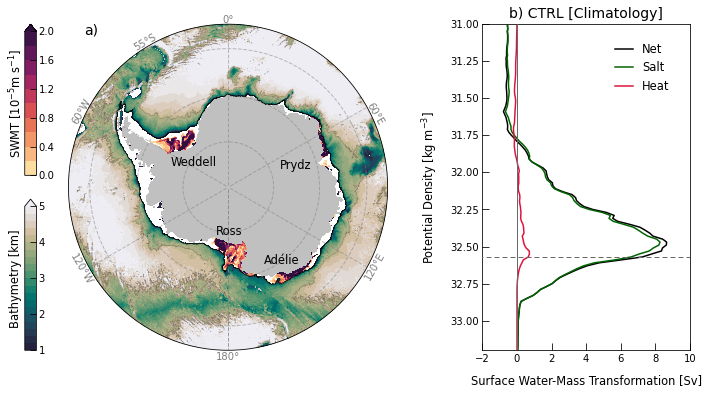

In [5]:
fig = plt.figure(1,figsize=(12,6))
gs = gridspec.GridSpec(1,2,width_ratios=[4,2])
gs.update(wspace=0.15)

ax,ax1 = plt.subplot(gs[0],projection=ccrs.SouthPolarStereo()),plt.subplot(gs[1])
###
ax = plt.subplot(gs[0],projection=ccrs.SouthPolarStereo())
add_circle(ax)
p1 = ax.contourf(lon,lat,swmt_shelf_mask,levels=levs_swmt,cmap=colormap_swmt,extend='max',zorder=1,transform=ccrs.PlateCarree())
p2 = ax.contourf(geolon,geolat,ht,levels=levs_ht,cmap=colormap_ht,extend='max',zorder=0,transform=ccrs.PlateCarree())
ax.contour(contour_4000m.xt_ocean,contour_4000m.yt_ocean,contour_4000m,[0,1],colors='k',linewidths=0.5,alpha=0.3,zorder=10,transform=ccrs.PlateCarree())
antarctic_map(ax,True,False,geolon_t_01,geolat_t_01,land_mask_01)
ax.set_extent([-180,180,-90,latN],ccrs.PlateCarree())
ax.outline_patch.set_visible(True)

add_grid_labels_SouthPolarStereo(ax,60,10,360,0,315,-180,latN,0.33,10,[1.145,0.735,0.9705,1.015,0.95,1.02],0.74)
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=False,linewidth=1,color='gray',alpha=0.5,linestyle='--',zorder=10)
gl.xlocator = mticker.FixedLocator(np.arange(-180,180+1,60))
gl.ylocator = mticker.FixedLocator(np.arange(-90,0+1,10))

plt.text(-70,-76.5,'Weddell',fontsize=11.5,transform=ccrs.PlateCarree(),zorder=15)
plt.text( 70,-78.0,'Prydz'  ,fontsize=11.5,transform=ccrs.PlateCarree(),zorder=15)
plt.text(155,-71.5,'Adélie' ,fontsize=11.5,transform=ccrs.PlateCarree(),zorder=15)
plt.text(195,-79.0,'Ross'   ,fontsize=11.5,transform=ccrs.PlateCarree(),zorder=15)

# Plot a colorbar
cax1 = fig.add_axes([0.13,0.530,0.0135,0.35])
cax2 = fig.add_axes([0.13,0.125,0.0135,0.35])
cb1 = plt.colorbar(p1,cax=cax1,orientation='vertical',shrink=0.5,ticks=levs_swmt[::2])
cb2 = plt.colorbar(p2,cax=cax2,orientation='vertical',shrink=0.5,ticks=levs_ht[::5])
cb1.set_label(unit_swmt,fontsize=11.5,labelpad=0)
cb2.set_label(unit_ht,fontsize=11.5,labelpad=3)
cb1.ax.tick_params(axis='y',direction='in',length=6,labelsize=10,pad=2)
cb2.ax.tick_params(axis='y',direction='in',length=6,labelsize=10,pad=2)
cax1.yaxis.set_label_position('left')
cax2.yaxis.set_label_position('left')
###
ax1.plot(swmt_net_shelf_sum ,isopycnal_bin_mid,linewidth=1.5,color=colors[0],label='Net')
ax1.plot(swmt_salt_shelf_sum,isopycnal_bin_mid,linewidth=1.5,color=colors[2],label='Salt')
ax1.plot(swmt_heat_shelf_sum,isopycnal_bin_mid,linewidth=1.5,color=colors[1],label='Heat')

leg = ax1.legend(fontsize=11.5,handlelength=1.5,ncol=1,loc='upper right',bbox_to_anchor=(0.95,0.975))
plt.setp(leg.get_texts(),color='black')
plt.setp(leg.get_texts(),color='black')
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.0)

ax1.plot([0,0],[31,33.2],linestyle='-',linewidth=1,color='dimgray',zorder=5)
ax1.plot([-5,15],[dmax,dmax],linestyle=(0,(5,3)),linewidth=1,color='dimgray',zorder=5)

ax1.set_xlim([-2,10])
ax1.set_xticks(np.arange(-2,10+0.01,2))
ax1.set_ylim((33.20,31))
ax1.set_yticks(np.arange(31,33.20+0.01,0.25))
ax1.tick_params(labelsize=10,direction='in',length=7)
ax1.set_ylabel(r'Potential Density [kg m$^{-3}$]',fontsize=11.5,labelpad=10)
ax1.set_xlabel(r'Surface Water-Mass Transformation [Sv]',fontsize=11.5,labelpad=10)

ax.set_title('a)' ,fontsize=14,loc='left',x=0.05,y=0.95)
ax1.set_title('b) CTRL [Climatology]',fontsize=14,loc='center',y=1.0);